In [6]:
#Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from PlotNonlinear import plotDecBoundaries_Nonlinear

ModuleNotFoundError: ignored

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Algorithm for multiclass perceptron

class Multiclass_perceptron:
    def __init__(self,x_train,y_train,x_test,y_test,learning_rate,W_0,max_epochs):
        self.Xtrain = x_train
        self.Xtest = x_test
        self.Ytrain = y_train
        self.Ytest = y_test
        self.learning_rate = learning_rate
        self.WM = W_0*np.ones((self.Xtrain.shape[1],np.unique(self.Ytrain).shape[0]))
        self.max_epoch = max_epochs
        
#ceriterion function
    def JW(self,w):
        dm = []
        running_sum = 0
        for i in self.Xtrain:
            dm.append(np.dot(w.T, i))

        for i,j in zip(dm,self.Ytrain):
            running_sum += i[j] - max(i)
        return -1*running_sum
#confusion_matrix
    def gen_confusion_matrix(self, w):
        dm = np.array([np.dot(w.T, i) for i in self.Xtest])
        ykes = np.array([np.argmax(distance) for distance in dm])
        cm = confusion_matrix(self.Ytest, ykes)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.figure()
        plt.show()
        return cm
# accuracy
    def accuracy(self, w):
        true = 0
        false = 0
        dm= []
        ykes = []
        for i in self.Xtest:
            dm.append(np.dot(w.T, i))
        for i in dm:
            ykes.append(np.argmax(i))
    
        train_true = 0
        train_false = 0
        dm_train= []
        ykes_train = []
        
        for i in self.Xtrain:
            dm_train.append(np.dot(w.T, i))
        for i in dm_train:
            ykes_train.append(np.argmax(i))
        
        for i,j in zip(ykes, self.Ytest):
            if(i==j):
                true+=1
            else:
                false+=1
        for i,j in zip(ykes_train, self.Ytrain):
            if(i==j):
                train_true+=1
            else:
                train_false+=1
        return train_true*100/self.Ytrain.shape[0], true*100/self.Ytest.shape[0]
    
#stochastic_gradient_descent
    def stochastic_gradient_descent(self):
        epoch = 1
        iteration = 0
        X = np.copy(self.Xtrain)
        Y = np.copy(self.Ytrain)
        W = np.copy(self.WM)
        w_array = np.zeros((100,17,7))
        j_array = np.zeros(100)
        while (epoch <= self.max_epoch):
            X,Y = shuffle(X,Y)
            k=0
            for i, j in zip(X,Y):
                iteration +=1
                g = np.dot(W.T, i)
                yk = np.argmax(g)
                if(yk != j):
                    W[:,j] = W[:,j] + self.learning_rate*i
                    W[:,yk] = W[:,yk] - self.learning_rate*i
                if(epoch == self.max_epoch and iteration > 1224800):
                    w_array[k] = W
                    jw = self.JW(W)
                    j_array[k] = jw
                    k+=1   
            epoch +=1
            if(epoch==101):
                min_i = np.argmin(j_array)
                w_opt = w_array[min_i]
                print(f"Lowest J(w):{min(j_array)}")
                return w_opt

    def print_weight_norms(self, w,loop=False):
      k=0
      weight_norms = np.zeros(7)
      for i in w.T:
        norm = np.linalg.norm(i)
        weight_norms[k] = norm
        k+=1
      return weight_norms
  
  

In [ ]:
#loafing the data
df1 = pd.read_csv('/content/drive/MyDrive/559/dataset/Dry_Bean_train.csv')
df2 = pd.read_csv('/content/drive/MyDrive/559/dataset/Dry_Bean_test.csv')

In [ ]:

x_train = df1.drop("Class",axis =1)
y_train = df1["Class"].map({'BARBUNYA':0,'BOMBAY':1, 'CALI':2,'HOROZ':3,'DERMASON':4,'SEKER':5,'SIRA':6 })

x_test = df2.drop("Class",axis =1)
y_test = df2["Class"].map({'BARBUNYA':0,'BOMBAY':1, 'CALI':2,'HOROZ':3,'DERMASON':4,'SEKER':5,'SIRA':6 })

std_scaler = StandardScaler()
x_train_n = std_scaler.fit_transform(x_train)
x_test_n = std_scaler.transform(x_test)

x_train_n = np.column_stack((np.ones(x_train_n.shape[0]), x_train_n[:,:]))
x_test_n = np.column_stack((np.ones(x_test_n.shape[0]), x_test_n[:,:]))
    

Lowest J(w):10433.551536212664


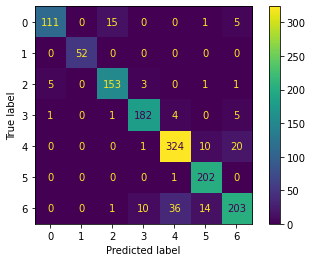

<Figure size 432x288 with 0 Axes>

In [ ]:
#Running the MP Algorithm once
p1 = Multiclass_perceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100)
W= p1.stochastic_gradient_descent()
accuracy_train, accuracy_test = p1.accuracy(W)
cm = p1.gen_confusion_matrix(W)
norms = p1.print_weight_norms(W)

In [ ]:
#accuracy for test and train
accuracy_test, accuracy_train

(90.08810572687224, 91.22377336925463)

In [ ]:
#norm and weight
norms, W.T

(array([ 94.92509607, 108.12441129,  72.99682653,  95.78553092,
         74.40551653,  68.56110932, 101.411386  ]),
 array([[  6.        ,   4.20008892,  20.77738283, -27.55963395,
          23.29398038, -42.73152836, -17.07962834,   7.64225671,
           0.9232718 ,   2.53768122, -10.87491351,  -5.68564129,
          -6.33921819,  27.49077858, -59.02878008, -18.71895224,
          16.08048703],
        [-63.        ,  45.2246711 ,   9.04638328,   6.97338832,
          17.57259806,  -7.62000594,  -3.16442351,  45.63647411,
          12.09639849,   0.82825227,  -0.41904949,  21.01088782,
           9.33866358,  41.0883933 ,  25.36811337,   8.88415138,
           0.11097793],
        [ -2.        ,   1.38321379, -29.81799602,  32.2606012 ,
          -7.82555044, -15.19852168,  15.9781391 ,   7.4840409 ,
          13.66822567,  -1.29829442,  -0.3408923 ,  10.06239819,
         -11.30187415, -43.92720756,  15.63475293, -13.74383017,
          -2.9451168 ],
        [  4.        , -28.03587

Trail No : 1
Lowest J(w):9305.435385360763


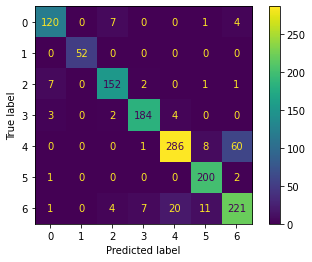

<Figure size 432x288 with 0 Axes>

Trail No : 2
Lowest J(w):9837.703809361838


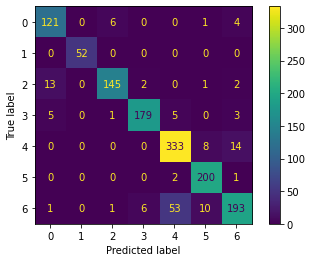

<Figure size 432x288 with 0 Axes>

Trail No : 3
Lowest J(w):8435.434579440862


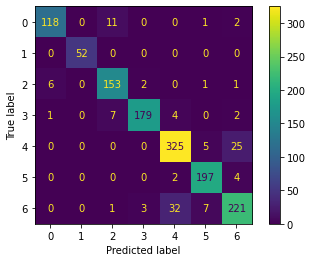

<Figure size 432x288 with 0 Axes>

Trail No : 4
Lowest J(w):9022.53895886862


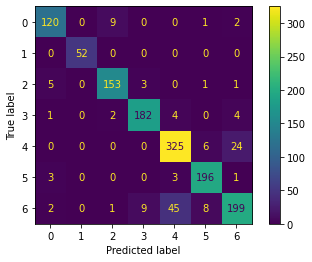

<Figure size 432x288 with 0 Axes>

Trail No : 5
Lowest J(w):10578.485558196051


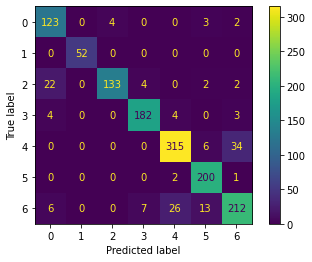

<Figure size 432x288 with 0 Axes>

Trail No : 6
Lowest J(w):9639.566109218784


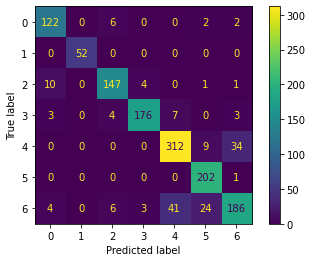

<Figure size 432x288 with 0 Axes>

Trail No : 7
Lowest J(w):10044.332151343517


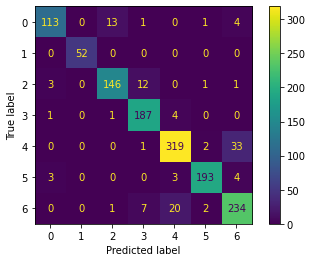

<Figure size 432x288 with 0 Axes>

Trail No : 8
Lowest J(w):10983.971731535006


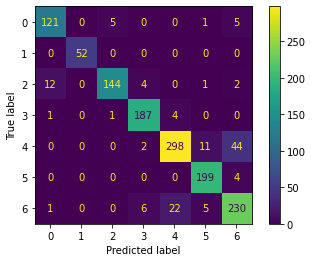

<Figure size 432x288 with 0 Axes>

Trail No : 9
Lowest J(w):10709.628596823795


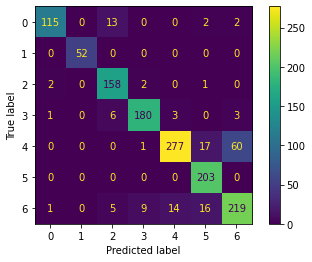

<Figure size 432x288 with 0 Axes>

Trail No : 10
Lowest J(w):9371.427504443142


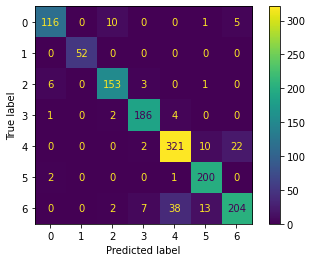

<Figure size 432x288 with 0 Axes>

In [ ]:
#Running the algorithm 10 times
norms_matrix_10 = np.zeros((10,7))
cm_matrix_10 = np.zeros((10,7,7))
accuracy_test_matrix_10 = np.zeros(10)
accuracy_train_matrix_10 = np.zeros(10)

for i in range(10):
  print(f"Trail No : {i+1}")
  p1 = Multiclass_perceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100)
  W= p1.stochastic_gradient_descent()
  accuracy_train, accuracy_test = p1.accuracy(W)
  cm = p1.gen_confusion_matrix(W)
  norms = p1.print_weight_norms(W)
  accuracy_train_matrix_10[i] = accuracy_train
  accuracy_test_matrix_10[i] = accuracy_test
  norms_matrix_10[i] = norms
  cm_matrix_10[i] = cm

In [ ]:
#mean
np.mean(accuracy_train_matrix_10), np.mean(accuracy_test_matrix_10)

(90.90048167197322, 89.97797356828194)

In [ ]:
#standard deviation
np.std(accuracy_train_matrix_10), np.std(accuracy_test_matrix_10)

(0.4911159696905892, 0.4646480861173779)

In [ ]:
#mean
np.mean(norms_matrix_10, axis = 0), np.std(norms_matrix_10, axis = 0)

(array([ 96.71508564, 111.690174  ,  73.45026137,  95.22034615,
         74.66378515,  68.21861056, 100.32374326]),
 array([1.42931066, 2.96261739, 1.46006519, 1.08476607, 1.52438516,
        1.18532237, 1.72483715]))

In [ ]:
#confusion matrix
mean_conf_matrix = np.mean(cm_matrix_10,axis = 0)
std_conf_matrix = np.std(cm_matrix_10, axis = 0)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

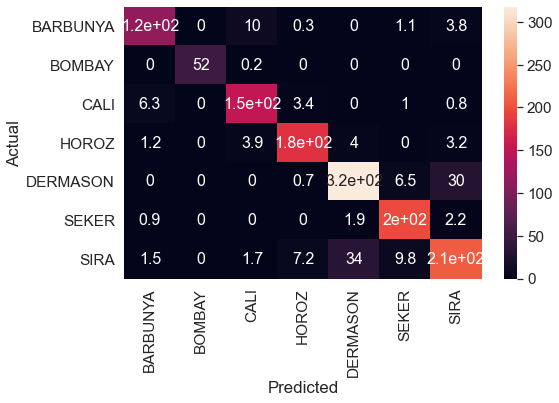

In [ ]:
#plotting
labels = ['BARBUNYA','BOMBAY', 'CALI','HOROZ','DERMASON','SEKER','SIRA']
df_cm = pd.DataFrame(mean_conf_matrix, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# 

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

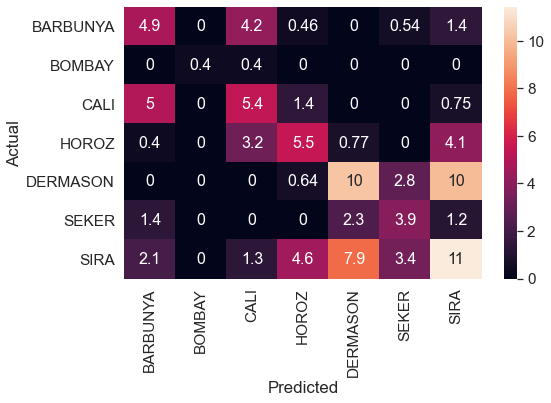

In [ ]:
#plotting
labels = ['BARBUNYA','BOMBAY', 'CALI','HOROZ','DERMASON','SEKER','SIRA']
df_cm = pd.DataFrame(std_conf_matrix, columns=labels, index = labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# 

In [ ]:
class preceptron:
    
    #defining all the variables
    def __init__(self,x_train,y_train,x_test,y_test,learning_rate,W_0,max_epochs,c):
        self.Xtrain = x_train
        self.Xtest = x_test
        self.Ytrain = y_train
        self.Ytest = y_test
        self.learning_rate = learning_rate
        self.WM = W_0*np.ones(self.Xtrain.shape[1])
        self.max_epoch = max_epochs
        self.c =c 
 
    #Multiplying other classes with -1
    def reflect_class2_points(self):
        zx = np.copy(self.Xtrain)
        for i in range(self.Xtrain.shape[0]):
            if(self.Ytrain[i]!=self.c):
                zx[i] = -1*self.Xtrain[i]
        print("Zn=-1 multiplied to other class")
        return zx
              
    #perceptron main function
    def algo_sequential(self):
        iteration = 0
        epoch = 1 
        weight_matrix_iteration = []
        jw_val_list_iteration = []
        wi = np.copy(self.WM)
        X = self.reflect_class2_points()
        Y = np.copy(self.Ytrain)
        
        while(epoch <= self.max_epoch):
            X,Y= shuffle(X,Y)
            jw_val = 0
            for i in X: 
                iteration+=1  
                if(np.dot(wi.T,i)<=0):
                    wi = wi + self.learning_rate*(i)
                   
                if(epoch == self.max_epoch and iteration >= (self.max_epoch*self.Xtrain.shape[0])-100):
                    jw_val = self.JW(wi)
                    weight_matrix_iteration.append(wi)
                    jw_val_list_iteration.append(jw_val) 
            
            if(epoch==self.max_epoch):
                min_index = jw_val_list_iteration.index(min(jw_val_list_iteration))
                w_opt = weight_matrix_iteration[min_index]
                return w_opt
            epoch+=1
            
    #criterion_function
    def JW(self,w):
        dm = []
        running_sum = 0
        for i in self.Xtrain:
            dm.append(np.dot(w.T, i))
        for i in dm:
            if(i<=0):
                running_sum+=i
        return -1*running_sum

    #prediction 
    def predict(self,w):
        classification_error = 0
        acc = 0
        for i,j in zip(self.Xtest,self.Ytest):
            if(np.dot(w.T,i)<=0 and j!=self.c):
                acc+=1
            elif(np.dot(w.T,i)>0 and j==self.c):
                acc+=1
            else:
                classification_error +=1
        print("Test Accuracy = ",acc*100/len(self.Xtest))
        print("Test Error Rate = ",classification_error*100/len(self.Xtest))

        train_classification_error = 0
        train_acc = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            if(np.dot(w.T,i)<=0 and j!=self.c):
                train_acc+=1
            elif(np.dot(w.T,i)>0 and j==self.c):
                train_acc+=1
            else:
                train_classification_error +=1
        print("Train Accuracy = ",train_acc*100/len(self.Xtrain))
        print("Train Error Rate = ",train_classification_error*100/len(self.Xtrain)) 
        return train_acc*100/len(self.Xtrain), acc*100/len(self.Xtest)
    
    #predictor 
    def predictor(self,x,w):
        predicted = np.dot(x,w)
        labs = []
        for i in predicted:
            if(i<=0):
                labs.append(2)
            else:
                labs.append(1)
        labs_arr = np.array(labs)
                
        return labs_arr
        
           
    #MaximalValueMethod    
    def MaximalValueMethod(self, W0,W1,W2,W3,W4,W5,W6):
        acc=0
        err = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Train Accuracy :",acc*100/len(self.Xtrain))
        
        acc=0
        err = 0
        for i,j in zip(self.Xtest,self.Ytest):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Test Accuracy :",acc*100/len(self.Xtest))
        
        
    def MaximalValueMethod_rule2(self, W0,W1,W2,W3,W4,W5,W6):
        acc=0
        err = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)/np.linalg.norm(W0[1:])
            l[1] = np.dot(W1.T,i)/np.linalg.norm(W1[1:])
            l[2] = np.dot(W2.T,i)/np.linalg.norm(W2[1:])
            l[3] = np.dot(W3.T,i)/np.linalg.norm(W3[1:])
            l[4] = np.dot(W4.T,i)/np.linalg.norm(W4[1:])
            l[5] = np.dot(W5.T,i)/np.linalg.norm(W5[1:])
            l[6] = np.dot(W6.T,i)/np.linalg.norm(W6[1:])
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Train Accuracy :",acc*100/len(self.Xtrain))
        
        acc=0
        err = 0
        for i,j in zip(self.Xtest,self.Ytest):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)/np.linalg.norm(W0[1:])
            l[1] = np.dot(W1.T,i)/np.linalg.norm(W1[1:])
            l[2] = np.dot(W2.T,i)/np.linalg.norm(W2[1:])
            l[3] = np.dot(W3.T,i)/np.linalg.norm(W3[1:])
            l[4] = np.dot(W4.T,i)/np.linalg.norm(W4[1:])
            l[5] = np.dot(W5.T,i)/np.linalg.norm(W5[1:])
            l[6] = np.dot(W6.T,i)/np.linalg.norm(W6[1:])
            plabel = np.argmax(l)
            if(plabel == j):
                acc+=1
            else:
                err+=1
        print("Test Accuracy :",acc*100/len(self.Xtest))

    #onevsrest  
    def onevsrest(self, W0,W1,W2,W3,W4,W5,W6):
        acc=0
        err = 0
        ind = 0
        for i,j in zip(self.Xtrain,self.Ytrain):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.where(l > 0)
                     
            if(len(plabel[0])> 1 or len(plabel[0])==0):
                ind+=1
            else: 
                if(plabel[0][0]==j):
                    acc+=1
                else:
                    err+=1
        print("Train Accuracy :",acc*100/len(self.Xtrain))
        print("Train Error :",err*100/len(self.Xtrain))
        print("Train Unclassified :",ind*100/len(self.Xtrain))
        
        acc=0
        err = 0
        ind = 0
        for i,j in zip(self.Xtest,self.Ytest):
            l=np.zeros(7)
            l[0] = np.dot(W0.T,i)
            l[1] = np.dot(W1.T,i)
            l[2] = np.dot(W2.T,i)
            l[3] = np.dot(W3.T,i)
            l[4] = np.dot(W4.T,i)
            l[5] = np.dot(W5.T,i)
            l[6] = np.dot(W6.T,i)
            plabel = np.where(l>0)
            if(len(plabel[0])> 1 or len(plabel[0])==0):
                ind+=1
            else: 
                if(plabel[0][0]==j):
                    acc+=1
                else:
                    err+=1
        print("Test Accuracy :",acc*100/len(self.Xtest))
        print("Test Error :",err*100/len(self.Xtest))
        print("Test Unclassified :",ind*100/len(self.Xtest))
    
    #plotting
    def plot_linear_boundary(self,w,data="Train"):
        if(data =="Test" ):
            x = np.copy(self.Xtrain[:,1:])
            y = np.copy(self.Ytrain)
        else:
            x = np.copy(self.Xtest[:,1:])
            y = np.copy(self.Ytest)

        x_min = min(x[:,0])
        x_max = max(x[:,0])
        plane = np.linspace(x_min,x_max)

        boundary = -(w[0]+w[1]*plane)/w[2]

        plt.scatter(x[y==1,0],x[y==1,1],label = "class 1")
        plt.scatter(x[y==2,0],x[y==2,1],label = "class 2")
        plt.plot(plane, boundary,color="red", label = "Decision Boundary")
        plt.ylabel("x1")
        plt.xlabel("x0")
        plt.legend()
        plt.show()
        
    
     
    def plot_multiclass_histograms(self,W,norm_W=False, scale=1, class_names=None):
        # This function is based on chugg_plot_multiclass_histograms() function in Prof. Chugg's mnist_multiclass_mse notebook
        #https://github.com/keithchugg/ee559_spring2023/blob/main/lecture/mnist_multiclass_mse.ipynb 
        
        y_soft = np.dot(self.Xtest, W)
        print(y_soft.shape)
        N,C = y_soft.shape
        y_hard = np.argmax(y_soft, axis=1)
        error_percent = 100 * np.sum(self.Ytest != y_hard) / len(self.Ytest) 

        fig, ax = plt.subplots(C, sharex=True, figsize=(12 * scale, 4 * C * scale))
        y_soft_cs = []
        conditional_error_rate = np.zeros(C)

        for c_true in range(C):
            y_soft_cs.append(self.Xtest[self.Ytest == c_true] @ W)
            y_hard_c = np.argmax(y_soft_cs[c_true], axis=1)
            conditional_error_rate[c_true] = 100 * np.sum(y_hard_c != c_true) / len(y_hard_c)
        for c_true in range(C):
            peak = -100
            for c in range(C):
                hc = ax[c_true].hist(y_soft_cs[c_true].T[c], bins = 10, alpha=0.4, label=class_names[c])
                peak = np.maximum(np.max(hc[0]), peak)
                ax[c_true].legend()
                ax[c_true].grid(':')
            ax[c_true].text(0, 0.9 * peak, f'True: {class_names[c_true]}\nConditional Error Rate = {conditional_error_rate[c_true] : 0.2f}%')
            if norm_W:
                ax[C-1].set_xlabel(r'normalized discriminant function $g_m(x) / || {\bf w} ||$')
            else:
                ax[C-1].set_xlabel(r'discriminant function $g_m(x)$')
            
        return error_percent


    

          

In [ ]:

#implementinf all algorithms here
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,0)
W0= p1.algo_sequential()
p1.predict(W0)


Zn=-1 multiplied to other class
Test Accuracy =  97.13656387665198
Test Error Rate =  2.8634361233480177
Train Accuracy =  96.90586986692792
Train Error Rate =  3.0941301330720874


In [ ]:
#for weight-1

p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,1)
W1= p1.algo_sequential()
p1.predict(W1)

Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0


In [ ]:
#for weight-2
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,2)
W2= p1.algo_sequential()
p1.predict(W2)

Zn=-1 multiplied to other class
Test Accuracy =  97.57709251101322
Test Error Rate =  2.4229074889867843
Train Accuracy =  97.45285329414646
Train Error Rate =  2.547146705853539


In [ ]:
#for weight-3
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,3)
W3= p1.algo_sequential()
p1.predict(W3)

Zn=-1 multiplied to other class
Test Accuracy =  98.09104258443466
Test Error Rate =  1.908957415565345
Train Accuracy =  97.82839415462487
Train Error Rate =  2.1716058453751326


In [ ]:
#for weight-4
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,4)
W4= p1.algo_sequential()
p1.predict(W4)

Zn=-1 multiplied to other class
Test Accuracy =  93.75917767988253
Test Error Rate =  6.240822320117474
Train Accuracy =  94.91387052004245
Train Error Rate =  5.086129479957547


In [ ]:
#for weight-5
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,5)
W5= p1.algo_sequential()
p1.predict(W5)

Zn=-1 multiplied to other class
Test Accuracy =  98.89867841409692
Test Error Rate =  1.1013215859030836
Train Accuracy =  98.43252510409013
Train Error Rate =  1.56747489590987


In [ ]:
#for weight-6
p1 = preceptron(x_train_n, y_train, x_test_n, y_test, 1,1, 100,6)
W6= p1.algo_sequential()
p1.predict(W6)

Zn=-1 multiplied to other class
Test Accuracy =  91.85022026431719
Test Error Rate =  8.14977973568282
Train Accuracy =  91.8279043187199
Train Error Rate =  8.172095681280105


In [ ]:
weight = np.array([W0,W1,W2,W3,W4,W5,W6]).T
weight.shape


(17, 7)

(1362, 7)


9.47136563876652

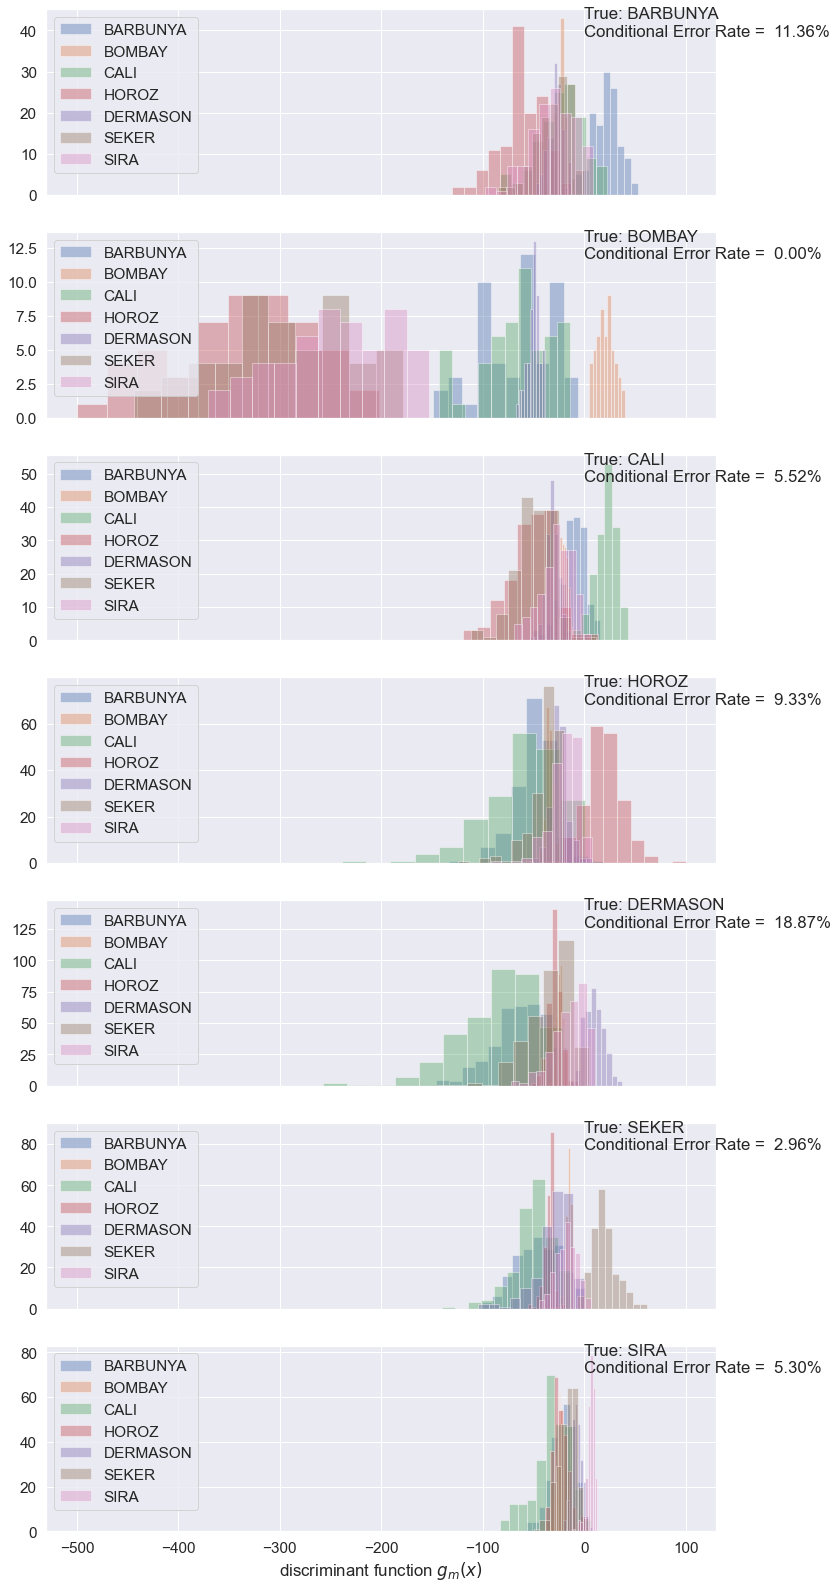

In [ ]:
#plotting 
labels = ['BARBUNYA','BOMBAY', 'CALI','HOROZ','DERMASON','SEKER','SIRA']
p1.plot_multiclass_histograms(weight,scale=1,class_names=labels)

In [ ]:
# calculating accuracy,error,unclassified for both train and test(one vs rest)
p1.onevsrest(W0,W1,W2,W3,W4,W5,W6)

Train Accuracy : 80.61066209486489
Train Error : 6.40052249163197
Train Unclassified : 12.988815413503144
Test Accuracy : 80.32305433186491
Test Error : 6.828193832599119
Test Unclassified : 12.848751835535976


In [ ]:
# calculating accuracy (MaximalValueMethod)
p1.MaximalValueMethod(W0,W1,W2,W3,W4,W5,W6)


Train Accuracy : 87.35406971997715
Test Accuracy : 86.49045521292217


In [ ]:
# calculating accuracy (MaximalValueMethod_2)
p1.MaximalValueMethod_rule2(W0,W1,W2,W3,W4,W5,W6)

Train Accuracy : 86.89688954200344
Test Accuracy : 85.5359765051395


In [ ]:
#loading the data sets
df11 =pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset1_train.csv', header=None)
df12 =pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset1_test.csv',header=None)

df3 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset2_train.csv', header=None)
df4 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset2_test.csv', header=None)

df5 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset3_train.csv', header=None)
df6 = pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW1_datasets/dataset3_test.csv', header=None)

In [ ]:
#converting to numpy

def convert_to_np(x,y):
    x_np = x.to_numpy()
    y_np = y.to_numpy()
    x_train = x_np[:,:2]
    y_train = x_np[:,2]
    x_test= y_np[:,:2]
    y_test= y_np[:,2]
    
    std_scaler = StandardScaler()
    x_train_n = std_scaler.fit_transform(x_train)
    x_test_n = std_scaler.transform(x_test)

    x_train_n = np.column_stack((np.ones(x_train_n.shape[0]), x_train_n[:,:]))
    x_test_n = np.column_stack((np.ones(x_test_n.shape[0]), x_test_n[:,:]))
    return x_train_n,y_train,x_test_n,y_test

In [ ]:
trainx1,trainy1,testx1,testy1 = convert_to_np(df11,df12)
trainx2,trainy2,testx2,testy2 = convert_to_np(df3,df4)
trainx3,trainy3,testx3,testy3 = convert_to_np(df5,df6)


Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0


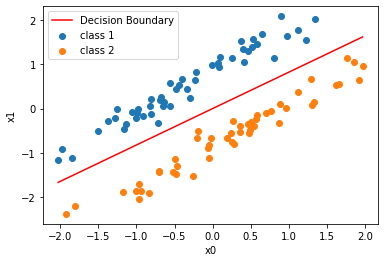

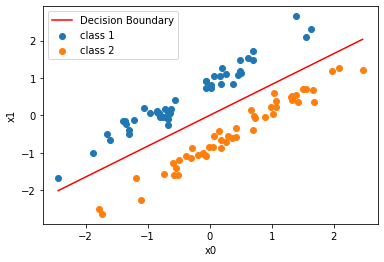

In [ ]:
#running class preceptron
p2 = preceptron(trainx1,trainy1,testx1,testy1,1,1,100,1)
W2= p2.algo_sequential()
p2.predict(W2)
p2.plot_linear_boundary(W2)
p2.plot_linear_boundary(W2, "Test")

Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0


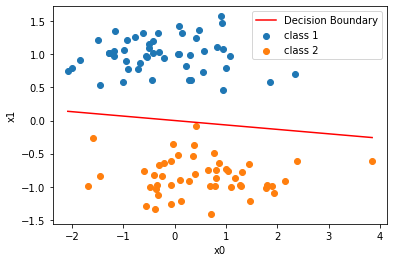

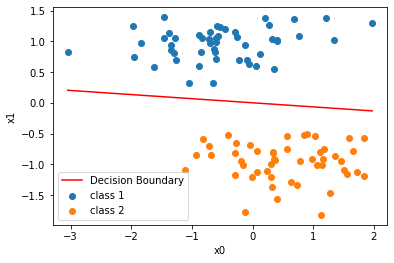

In [ ]:
#running class preceptron
p3 = preceptron(trainx2,trainy2,testx2,testy2,1,1,100,1)
W2= p3.algo_sequential()
p3.predict(W2)
p3.plot_linear_boundary(W2)
p3.plot_linear_boundary(W2, "Test")

Zn=-1 multiplied to other class
Test Accuracy =  36.0
Test Error Rate =  64.0
Train Accuracy =  42.0
Train Error Rate =  58.0


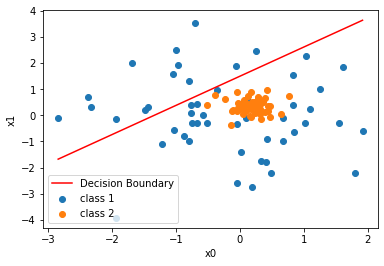

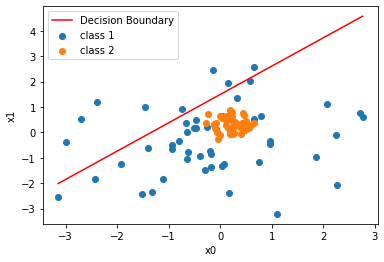

In [ ]:
#running class preceptron
p4 = preceptron(trainx3,trainy3,testx3,testy3,1,1,100,1)
W2= p4.algo_sequential()
p4.predict(W2)
p4.plot_linear_boundary(W2)
p4.plot_linear_boundary(W2, "Test")

In [ ]:
#Running the algorithm 10 times
def func1(x,y,X,Y):
  accuracy_test_matrix_10 = np.zeros(10)
  accuracy_train_matrix_10 = np.zeros(10)

  for i in range(10):
    print(f"Trail No : {i+1}")
    DSP = preceptron(x,y,X,Y,1,1,100,1)
    W= DSP.algo_sequential()
    accuracy_train, accuracy_test = DSP.predict(W)

    accuracy_train_matrix_10[i] = accuracy_train
    accuracy_test_matrix_10[i] = accuracy_test
    
  print("Means",np.mean(accuracy_train_matrix_10), np.mean(accuracy_test_matrix_10))
  print("STD",np.std(accuracy_train_matrix_10), np.std(accuracy_test_matrix_10))

In [ ]:
#calling the function
func1(trainx1,trainy1,testx1,testy1)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 8
Zn=-1 multiplie

In [ ]:
#calling the function
func1(trainx2,trainy2,testx2,testy2)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  97.0
Test Error Rate =  3.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  96.0
Test Error Rate =  4.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 8
Zn=-1 multiplied to 

In [ ]:
#calling the function
func1(trainx3,trainy3,testx3,testy3)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  46.0
Test Error Rate =  54.0
Train Accuracy =  47.0
Train Error Rate =  53.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  48.0
Test Error Rate =  52.0
Train Accuracy =  48.0
Train Error Rate =  52.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  49.0
Test Error Rate =  51.0
Train Accuracy =  50.0
Train Error Rate =  50.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  46.0
Test Error Rate =  54.0
Train Accuracy =  47.0
Train Error Rate =  53.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  50.0
Test Error Rate =  50.0
Train Accuracy =  50.0
Train Error Rate =  50.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  50.0
Test Error Rate =  50.0
Train Accuracy =  50.0
Train Error Rate =  50.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  44.0
Test Error Rate =  56.0
Train Accuracy =  47.0
Train Error Rate =  53.0
Trail No : 8
Zn=-1 multipli

In [ ]:
#Transformation Quadratic polynomial with augmented
def transformation1(x):
    t = np.zeros((x.shape[0],6))
    for i in range(x.shape[0]):
        t[i][0] = 1
        t[i][1] = x[i][1]
        t[i][2] = x[i][2]
        t[i][3] = x[i][1]**2
        t[i][4] = x[i][1]*x[i][2]
        t[i][5] = x[i][2]**2 
    return t
#Transformation Cubic polynomial with augmented
def transformation2(x):
    t = np.zeros((x.shape[0],10))
    for i in range(x.shape[0]):
        t[i][0] = 1
        t[i][1] = x[i][1]
        t[i][2] = x[i][2]
        t[i][3] = x[i][1]**2
        t[i][4] = x[i][1]*x[i][2]
        t[i][5] = x[i][2]**2 
        t[i][6] = x[i][1]**3
        t[i][7] = (x[i][1]**2)*x[i][2]
        t[i][8] = (x[i][2]**2)*x[i][1]
        t[i][9] = x[i][2]**3
    return t
#Transformation Quadratic polynomial without augmented
def transformation11(x):
    t = np.zeros((x.shape[0],6))
    for i in range(x.shape[0]):
        t[i][0] = 1
        t[i][1] = x[i][0]
        t[i][2] = x[i][1]
        t[i][3] = x[i][0]**2
        t[i][4] = x[i][1]*x[i][0]
        t[i][5] = x[i][1]**2 
    return t
#Transformation Quadratic polynomial without augmented
def transformation22(x):
    t = np.zeros((x.shape[0],10))
    for i in range(x.shape[0]):
        t[i][0] = 1
        t[i][1] = x[i][0]
        t[i][2] = x[i][1]
        t[i][3] = x[i][0]**2
        t[i][4] = x[i][1]*x[i][0]
        t[i][5] = x[i][1]**2 
        t[i][6] = x[i][0]**3
        t[i][7] = (x[i][0]**2)*x[i][1]
        t[i][8] = (x[i][1]**2)*x[i][0]
        t[i][9] = x[i][1]**3
    return t
    

Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0


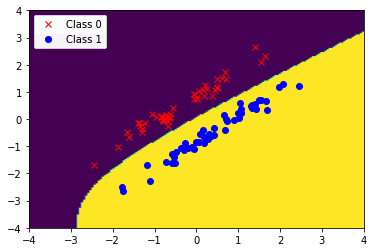

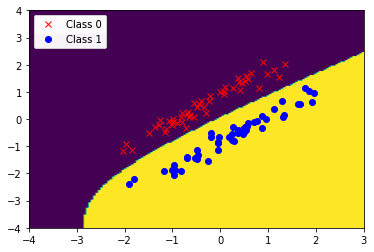

In [ ]:
#running class preceptron for transformed data for Quadratic polynomial
p5 = preceptron(transformation1(trainx1),trainy1, transformation1(testx1),testy1,1,1,100,1)
W = p5.algo_sequential()
p5.predict(W)
plotDecBoundaries_Nonlinear(trainx1[:,1:],trainy1,transformation11,p5.predictor,W,legend_on=True)
plotDecBoundaries_Nonlinear(testx1[:,1:],testy1,transformation11,p5.predictor,W,legend_on=True)

Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0


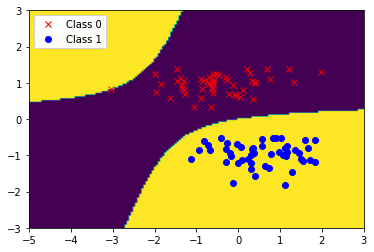

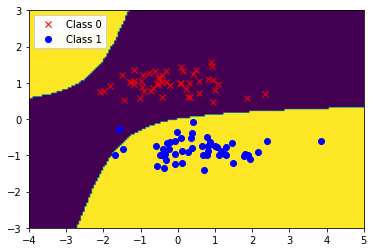

In [ ]:
#running class preceptron for transformed data for Quadratic polynomial
p6 = preceptron(transformation1(trainx2),trainy2, transformation1(testx2),testy2,1,1,100,1)
W = p6.algo_sequential()
p6.predict(W)
plotDecBoundaries_Nonlinear(trainx2[:,1:],trainy2,transformation11,p6.predictor,W,legend_on=True)
plotDecBoundaries_Nonlinear(testx2[:,1:],testy2,transformation11,p6.predictor,W,legend_on=True)

Zn=-1 multiplied to other class
Test Accuracy =  88.0
Test Error Rate =  12.0
Train Accuracy =  91.0
Train Error Rate =  9.0


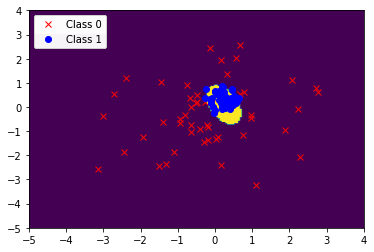

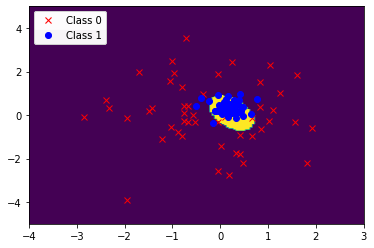

In [ ]:
#running class preceptron for transformed data for Quadratic polynomial
p7 = preceptron(transformation1(trainx3),trainy3, transformation1(testx3),testy3,1,1,100,1)
W = p7.algo_sequential()
p7.predict(W)
plotDecBoundaries_Nonlinear(trainx3[:,1:],trainy3,transformation11,p7.predictor,W,legend_on=True)
plotDecBoundaries_Nonlinear(testx3[:,1:],testy3,transformation11,p7.predictor,W,legend_on=True)

In [ ]:
func1(transformation1(trainx1),trainy1,transformation1(testx1),testy1)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  98.0
Test Error Rate =  2.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  98.0
Test Error Rate =  2.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  98.0
Test Error Rate =  2.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 8
Zn=-1 multiplied t

In [ ]:
func1(transformation1(trainx2),trainy2,transformation1(testx2),testy2)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  97.0
Test Error Rate =  3.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  96.0
Test Error Rate =  4.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  96.0
Test Error Rate =  4.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  95.0
Test Error Rate =  5.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  98.0
Test Error Rate =  2.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 8
Zn=-1 multiplied to 

In [ ]:
func1(transformation1(trainx3),trainy3,transformation1(testx3),testy3)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  92.0
Test Error Rate =  8.0
Train Accuracy =  93.0
Train Error Rate =  7.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  69.0
Test Error Rate =  31.0
Train Accuracy =  72.0
Train Error Rate =  28.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  82.0
Test Error Rate =  18.0
Train Accuracy =  85.0
Train Error Rate =  15.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  85.0
Test Error Rate =  15.0
Train Accuracy =  87.0
Train Error Rate =  13.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  76.0
Test Error Rate =  24.0
Train Accuracy =  73.0
Train Error Rate =  27.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  90.0
Test Error Rate =  10.0
Train Accuracy =  90.0
Train Error Rate =  10.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  77.0
Test Error Rate =  23.0
Train Accuracy =  74.0
Train Error Rate =  26.0
Trail No : 8
Zn=-1 multiplied

Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0


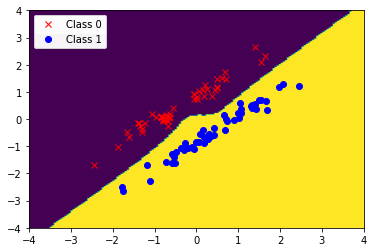

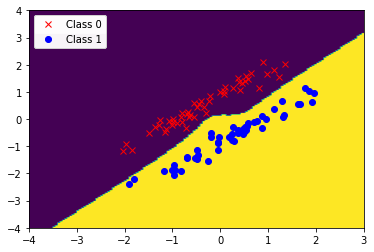

In [ ]:
#running class preceptron for transformed data for Cubic polynomial
p5 = preceptron(transformation2(trainx1),trainy1, transformation2(testx1),testy1,1,1,100,1)
W = p5.algo_sequential()
p5.predict(W)
plotDecBoundaries_Nonlinear(trainx1[:,1:],trainy1,transformation22,p5.predictor,W,legend_on=True)
plotDecBoundaries_Nonlinear(testx1[:,1:],testy1,transformation22,p5.predictor,W,legend_on=True)

Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0


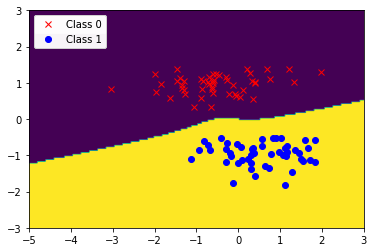

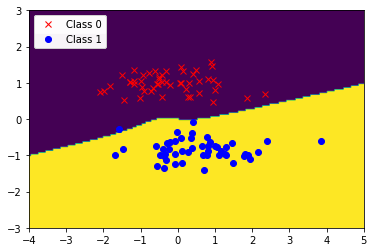

In [ ]:
#running class preceptron for transformed data for Cubic polynomial
p5 = preceptron(transformation2(trainx2),trainy2, transformation2(testx2),testy2,1,1,100,1)
W = p5.algo_sequential()
p5.predict(W)
plotDecBoundaries_Nonlinear(trainx2[:,1:],trainy2,transformation22,p5.predictor,W,legend_on=True)
plotDecBoundaries_Nonlinear(testx2[:,1:],testy2,transformation22,p5.predictor,W,legend_on=True)

Zn=-1 multiplied to other class
Test Accuracy =  89.0
Test Error Rate =  11.0
Train Accuracy =  90.0
Train Error Rate =  10.0


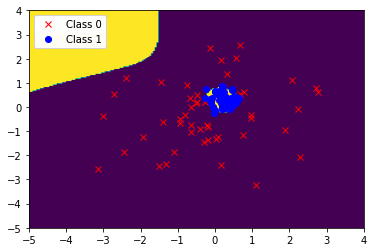

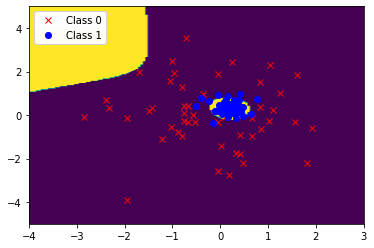

In [ ]:
#running class preceptron for transformed data for Cubic polynomial
p5 = preceptron(transformation2(trainx3),trainy3, transformation2(testx3),testy3,1,1,100,1)
W = p5.algo_sequential()
p5.predict(W)
plotDecBoundaries_Nonlinear(trainx3[:,1:],trainy3,transformation22,p5.predictor,W,legend_on=True)
plotDecBoundaries_Nonlinear(testx3[:,1:],testy3,transformation22,p5.predictor,W,legend_on=True)

In [ ]:
func1(transformation2(trainx1),trainy1,transformation2(testx1),testy1)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  100.0
Test Error Rate =  0.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  98.0
Test Error Rate =  2.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 8
Zn=-1 multiplie

In [ ]:
func1(transformation2(trainx2),trainy2,transformation2(testx2),testy2)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  94.0
Test Error Rate =  6.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  95.0
Test Error Rate =  5.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  98.0
Test Error Rate =  2.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  99.0
Test Error Rate =  1.0
Train Accuracy =  100.0
Train Error Rate =  0.0
Trail No : 8
Zn=-1 multiplied to o

In [ ]:
func1(transformation2(trainx3),trainy3,transformation2(testx3),testy3)

Trail No : 1
Zn=-1 multiplied to other class
Test Accuracy =  91.0
Test Error Rate =  9.0
Train Accuracy =  93.0
Train Error Rate =  7.0
Trail No : 2
Zn=-1 multiplied to other class
Test Accuracy =  87.0
Test Error Rate =  13.0
Train Accuracy =  88.0
Train Error Rate =  12.0
Trail No : 3
Zn=-1 multiplied to other class
Test Accuracy =  85.0
Test Error Rate =  15.0
Train Accuracy =  91.0
Train Error Rate =  9.0
Trail No : 4
Zn=-1 multiplied to other class
Test Accuracy =  88.0
Test Error Rate =  12.0
Train Accuracy =  95.0
Train Error Rate =  5.0
Trail No : 5
Zn=-1 multiplied to other class
Test Accuracy =  89.0
Test Error Rate =  11.0
Train Accuracy =  91.0
Train Error Rate =  9.0
Trail No : 6
Zn=-1 multiplied to other class
Test Accuracy =  89.0
Test Error Rate =  11.0
Train Accuracy =  92.0
Train Error Rate =  8.0
Trail No : 7
Zn=-1 multiplied to other class
Test Accuracy =  90.0
Test Error Rate =  10.0
Train Accuracy =  94.0
Train Error Rate =  6.0
Trail No : 8
Zn=-1 multiplied to o